# TensorFlow2 API로 모델 구성

 TensorFlow2에서 딥러닝 모델을 작성하는 방법에는 크게 3가지가 있는데,Sequential, Functional, Model Subclassing 방법이다.

### 모델 구성방식에 따른 특징
Sequential API
- 초보자가 접근하기에 매우 쉽다
- 모델의 입력과 출력이 여러 개인 경우에는 적합하지 않다.
- Sequential 모델은 반드시 입력 1가지, 출력 1가지를 전제로 한다.

Functional API
- Sequential모델과 다른 점은 바로 keras.Model을 사용한다는 점이다.
- 함수형으로 모델을 구성가능하여 다중 입력/출력을 가지는 모델을 구성이 가능하다.

Model Subclassing
- 본질적으로는 Functional한 접근과 차이가 없지만 제일 자유로운 모델링을 할 수있다.
- init()이라는 메서드 안에서 레이어를 구성한다.
- call()이라는 메서드 안에서 레이어 간 forward propagation을 진행한다.
 -  call()의 입력이 Input이고, call()의 리턴값(예측값)이 Output이 된다.

추가적으로 텐서플로2.0 공식사이트 코드를 활용하여 TensorFlow2 API로 모델을 구성하는 3가지 방식을 정리해보았다. 아래는 참고 사이트이다.

- [텐서플로 2.0 시작하기: 초보자용](https://www.tensorflow.org/tutorials/quickstart/beginner)
- [Sequential 모델](https://www.tensorflow.org/guide/keras/sequential_model)
- [기능적 API](https://www.tensorflow.org/guide/keras/functional)
- [전문가를 위한 TensorFlow 2](https://www.tensorflow.org/tutorials/quickstart/advanced)

# Sequential API 활용 모델

### 미리 입력 형상 지정하기
- Keras의 모든 레이어는 가중치를 만들려면 입력의 형상을 알아야 합니다
- 가중치는 모양이 입력의 형상에 따라 달라지기 때문에 입력에서 처음 호출될 때 가중치를 만듭니다.

**하지만 아래 코드는 입력값을 따로 지정하지 않고 모델이 구성되어있어도 잘작동한다. 그것은 model.fit함수에서 들어온 입력값으로 keras에서 내부적으로 입력형상을 셋팅해주기 때문이다**
- 참고 : [link](https://stackoverflow.com/questions/57871463/keras-sequential-without-providing-input-shape/57887629)

In [1]:
import tensorflow as tf

#MNIST 데이터셋을 로드하여 준비합니다. 
mnist = tf.keras.datasets.mnist

#샘플 값을 정수에서 부동소수로 변환합니다:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#층을 차례대로 쌓아 tf.keras.Sequential 모델을 만듭니다. 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델을 훈련하고 평가합니다:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

# Functional API 활용 모델

- 주요 개념은 딥 러닝 모델은 일반적으로 레이어의 DAG(directed acyclic graph)라는 것이다. 
- 따라서 함수형 API는 레이어의 그래프를 빌드한다.

```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers


# 데이터의 모양은 784 차원 벡터로 설정. 각 샘플의 모양 만 지정되므로 배치 크기는 항상 생략한다.
# 입력값으로 Input_shape또는 input_dim을 설정한다.
model = Sequential()
inputs = keras.Input(shape=(784,)) # 예를 들어 (32, 32, 3) 모양의 이미지 입력이있는 경우 다음을 사용한다. keras.Input(shape=(32, 32, 3))
print(inputs.shape)

(None, 784)


"레이어 호출" 동작은 "입력"에서 생성된 레이어로 화살표를 그리는 것과 같습니다. 입력을 dense 레이어로 "전달"하고 x를 출력으로 가져옵니다.

레이어 그래프에 레이어를 몇 개 레이어를 더 추가해 보겠습니다.

In [15]:
x = layers.Dense(64, activation="relu")(inputs)
print(x.shape)
x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(10)(x)
print(outputs.shape)

(None, 64)
(None, 64)
(None, 10)


In [16]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Summary 내용으로 구성된 모델의 세부사항을 확인해보자

### Layer(type) 
- 레이어의 이름과 타입, 지정된 레이어의 이름이 없으면 내부적으로 컴파일 순서에 맞게 지정된다. dense_17, dense_18, dense_19 이라고 이름 붙여진 3개의 Dense레이어로 구성된 모델이다.

 

### Output Shape:

 - [(None, 784)]은 None개의 행과 784개의 아웃풋 값이 입력층으로 들어온다는 뜻이다. 
 - 행이 None인 이유은 계속적으로 샘플들이 들어온다는 의미로 열에 맞추어 작업이 진행된다는 뜻.
 

![dl](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/SLP.png)

### Param:
파라미터의 수, 입력노드와 출력노드에 가중치, bias의 총 개수이다. 입력노드와 출력노드를 잊는 선의 수는 가중치이며 bias는 가중치가 0인 경우 학습이 되지 않을것을 대비해 입력 노드의 수만큼 baise노드가 추가된다.
```
파라미터의 수 = 가중치 개수(input노드수 x output노드수) + bias 개수(output노드수)

50240  = 784*64 + 64
4160 = 64*64 + 64
650 = 64*10 + 10
```


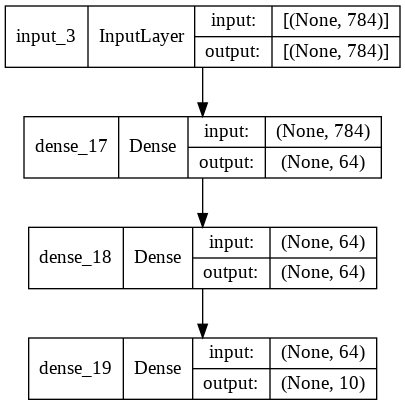

In [17]:
# 플롯 된 그래프에 각 레이어의 입력 및 출력 모양을 표시
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

# Model Subclassing 활용 모델
- init() 메서드 안에서 레이어를 선언
- call() 메서드 안에서 forward propagation을 구현하는 방식

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

# tf.data를 사용하여 데이터셋을 섞고 배치를 만듭니다
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

---
# Reference
- [함수형으로 모델 구축(다중입력)](https://ebbnflow.tistory.com/128)
- [Bias가 Neural Network에 끼치는 영향](https://ddingg.tistory.com/67)